In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import re
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
max_words = 10000
max_len = 200

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

def decode_reviews(encoded_reviews):
    word_index = imdb.get_word_index()
    index_word = {index + 3: word for word, index in word_index.items()}
    index_word[0] = "<PAD>"
    index_word[1] = "<START>"
    index_word[2] = "<UNK>"
    index_word[3] = "<UNUSED>"
    return [' '.join(index_word.get(i, '?') for i in review) for review in encoded_reviews]

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
decoded_x_train = decode_reviews(x_train)

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(decoded_x_train)

x_train = pad_sequences(tokenizer.texts_to_sequences(decoded_x_train), maxlen=max_len)
x_test = pad_sequences(tokenizer.texts_to_sequences(decode_reviews(x_test)), maxlen=max_len)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 558s 2s/step - accuracy: 0.6884 - loss: 0.5630 - val_accuracy: 0.8258 - val_loss: 0.4106
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 551s 2s/step - accuracy: 0.8871 - loss: 0.2874 - val_accuracy: 0.8504 - val_loss: 0.3451
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 528s 2s/step - accuracy: 0.9375 - loss: 0.1883 - val_accuracy: 0.8492 - val_loss: 0.3474
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 571s 2s/step - accuracy: 0.9613 - loss: 0.1190 - val_accuracy: 0.8608 - val_loss: 0.3849
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 559s 2s/step - accuracy: 0.9727 - loss: 0.0883 - val_accuracy: 0.8562 - val_loss: 0.5397
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 557s 2s/step - accuracy: 0.9725 - loss: 0.0816 - val_accuracy: 0.8566 - val_loss: 0.5078
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 564s 2s/step - accuracy: 0.9825 - loss: 0.0564 - val_accuracy: 0.8378 - val_loss: 0.5080


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 259s 332ms/step - accuracy: 0.8457 - loss: 0.3533
Test Accuracy: 0.8490


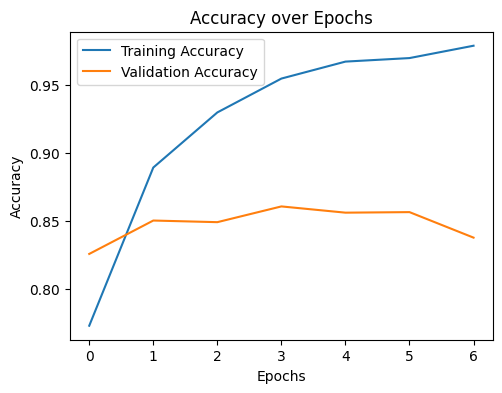

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

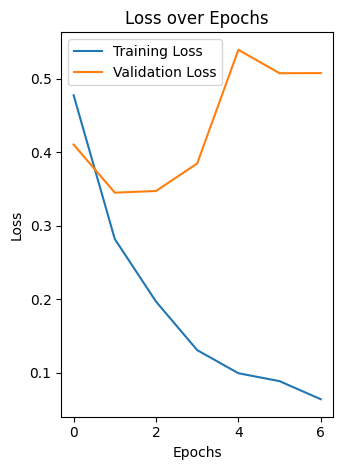

In [ ]:
# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
def preprocess_review(review):
    review = [re.sub(r'[^a-zA-Z\s]', '', r.lower()) for r in review]
    sequences = tokenizer.texts_to_sequences(review)
    return pad_sequences(sequences, maxlen=max_len)

sample_reviews = [
    "This movie was fantastic! I really enjoyed it.",
    "Terrible movie. I hated it.",
    "It was okay, not the best I've seen.",
    "Amazing! A true masterpiece!"
]

preprocessed_reviews = preprocess_review(sample_reviews)

predictions = model.predict(preprocessed_reviews)

for review, prediction in zip(sample_reviews, predictions):
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    print(f"Review: {review}\nPredicted Sentiment: {sentiment} (Score: {prediction[0]:.4f})\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
Review: This movie was fantastic! I really enjoyed it.
Predicted Sentiment: Positive (Score: 0.8282)

Review: Terrible movie. I hated it.
Predicted Sentiment: Negative (Score: 0.2109)

Review: It was okay, not the best I've seen.
Predicted Sentiment: Positive (Score: 0.5571)

Review: Amazing! A true masterpiece!
Predicted Sentiment: Positive (Score: 0.8390)

